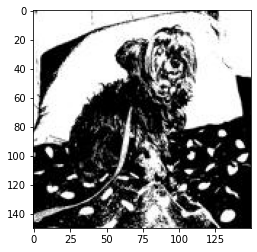

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
# generate random integer values
from random import seed
from random import randint

# seed random number generator
seed(1)

#where your main data set is; in this case pets
data = "C:\Datasets\PetImages\Grayscale"
#inside our folder we have two folders, "dog" and "cat"
categories = ['dog', 'cat']
#image resolution
resolution = 150

for category in categories:
    path = os.path.join(data, category) #will join base directory PetImages with the category we're on
    for img in os.listdir(path): #for every image in each folder
        image_arr = cv2.imread(os.path.join(path, img)) #will read each image in grayscale
        plt.imshow(image_arr, cmap="gray") #shows image
        plt.show()
        break
    break

In [2]:
#create training data
train = []
test = []

def create_training_and_test_data():
    for category in categories:
        path = os.path.join(data, category) #will join base directory PetImages with the category we're on
        class_num = categories.index(category)
        for img in os.listdir(path): #for every image in each folder
            try:
                image_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #will read each image in grayscale
                value = randint(0, 10)
                if(value > 2):
                    train.append([image_arr, class_num])
                else:
                    test.append([image_arr, class_num])
            except Exception as e:
                pass

create_training_and_test_data()

In [3]:
print(len(train))

18212


In [4]:
print(len(test))

6786


In [5]:
import random
random.shuffle(train)
random.shuffle(test)
print(len(train))

18212


In [6]:
for sample in train[:10]:
    print(sample[1])

0
1
0
0
0
1
0
1
1
0


In [7]:
X_train = []
y_train = []
X_test = []
y_test = []

In [8]:
for features, label in train:
    X_train.append(features/255.0)
    y_train.append(label)
    
for features, label in test:
    X_test.append(features/255.0)
    y_test.append(label)

In [11]:
print(len(X_train))
print(len(X_test))

18212
6786


In [12]:
X_train = np.array(X_train).reshape(-1, 150, 150, 1)
X_train = X_train.astype(np.uint8)

y_train = np.array(y_train)
y_train = y_train.astype(np.uint8)

X_test = np.array(X_test).reshape(-1, 150, 150, 1)
X_test = X_test.astype(np.uint8)

y_test = np.array(y_test)
y_test = y_test.astype(np.uint8)

In [14]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)

18212
18212
(18212, 150, 150, 1)


In [16]:
#put all preprocessed data into pickle!
import pickle

pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()